# DenguDisease Analysis using Time Series Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
Dengu = pd.read_csv('Data/New/DenguDiseas-TS.csv')
Dengu.head()

,year,Cases
0,2009-07,6
1,2009-08,186
2,2009-09,267
3,2009-10,248
4,2009-11,0


In [3]:
Dengu.tail()

,year,Cases
45,2018-07,987
46,2018-08,2031
47,2018-09,5082
48,2018-10,4034
49,2018-11,1591


In [4]:
Dengu.shape

(50, 2)

# Data Preprocessing

In [5]:
#To check out have any null value in any column on our data set.
Dengu.isnull().sum()

year     0
Cases    0
dtype: int64

In [6]:
#Parse strings to datetime type
Dengu['year'] = pd.to_datetime(Dengu['year'], infer_datetime_format=True)
indexedDengu=Dengu.set_index(['year'])

In [7]:
indexedDengu.head(5)

,Cases
year,
2009-07-01,6
2009-08-01,186
2009-09-01,267
2009-10-01,248
2009-11-01,0


In [8]:
indexedDengu.dtypes

Cases    int64
dtype: object

In [9]:
indexedDengu.describe()

,Cases
count,50.00000
mean,682.00000
std,960.42582
min,0.00000
25%,124.25000
50%,412.00000
75%,802.00000
max,5082.00000


In [10]:
#from datetime import datetime
indexedDengu.head(5)

,Cases
year,
2009-07-01,6
2009-08-01,186
2009-09-01,267
2009-10-01,248
2009-11-01,0


# Plot Our Dataset

In [11]:
import matplotlib.pylab as plt
%matplotlib inline

#Increas the figure size
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]= 10 , 6

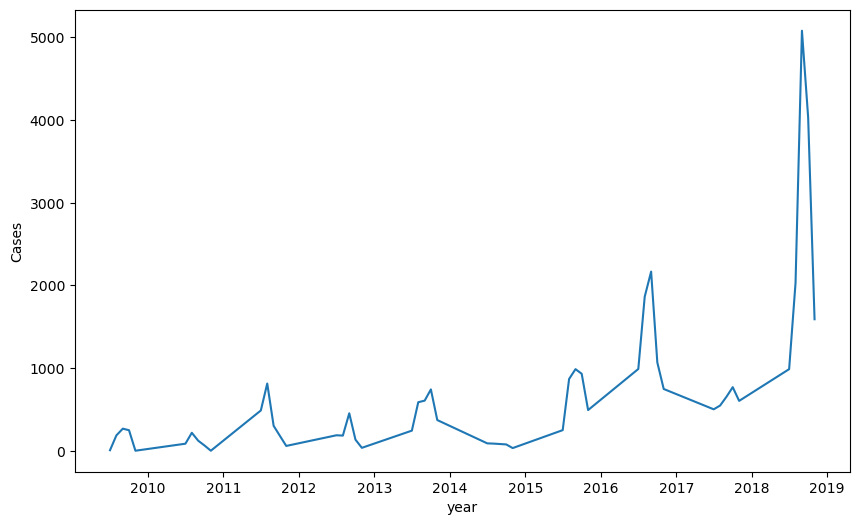

In [12]:
#Plot graph

plt.xlabel("year")
plt.ylabel("Cases")
plt.plot(indexedDengu)

# 2009 To 2011

<AxesSubplot:xlabel='year'>

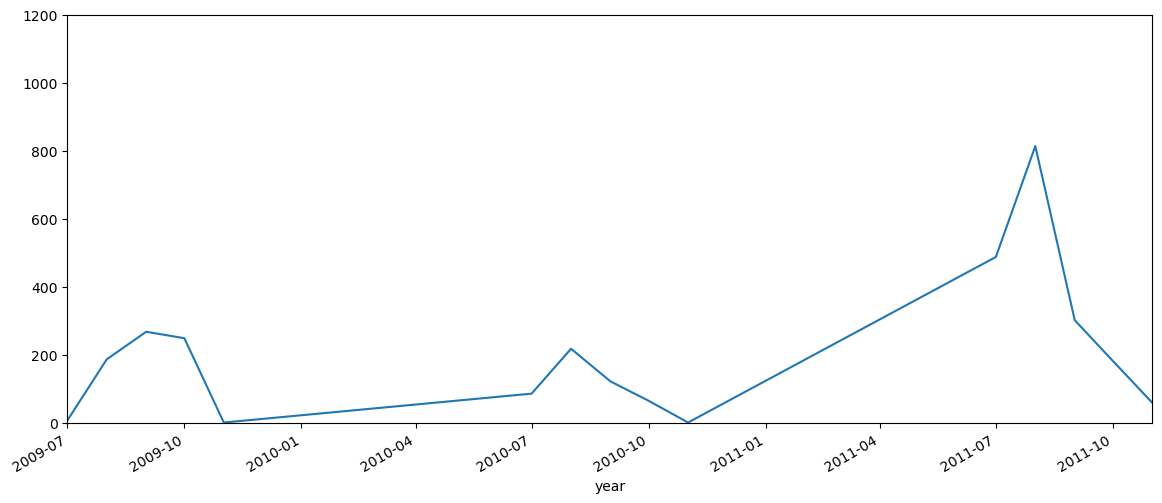

In [15]:
## xlimit and y limit
indexedDengu['Cases'].plot(xlim=['2009-07-01','2011-11-01'],ylim=[0,1200],figsize=(14,6))

# 2012 To 2014

<AxesSubplot:xlabel='year'>

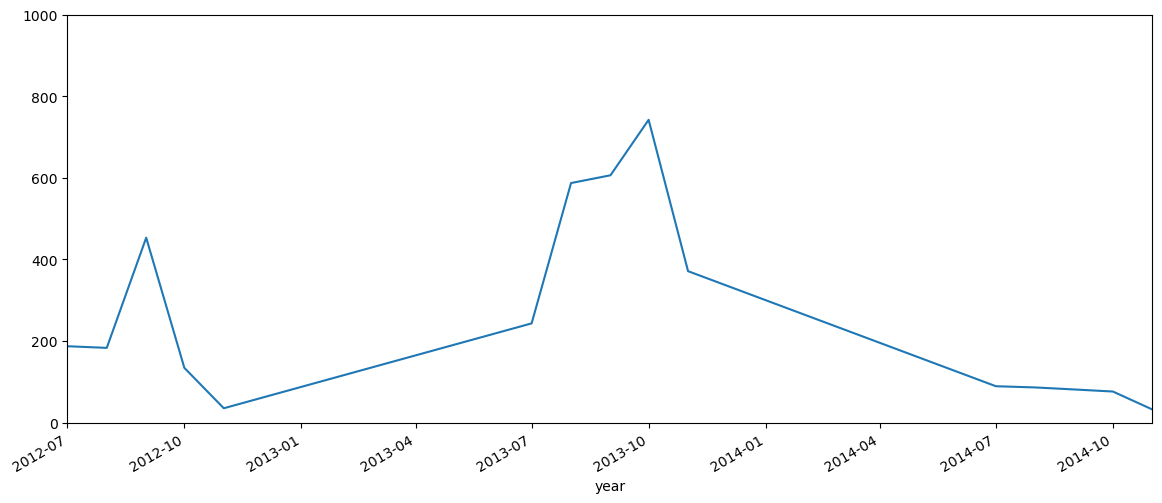

In [17]:
## xlimit and y limit
indexedDengu['Cases'].plot(xlim=['2012-07-01','2014-11-01'],ylim=[0,1000],figsize=(14,6))

# 2015 To 2018

<AxesSubplot:xlabel='year'>

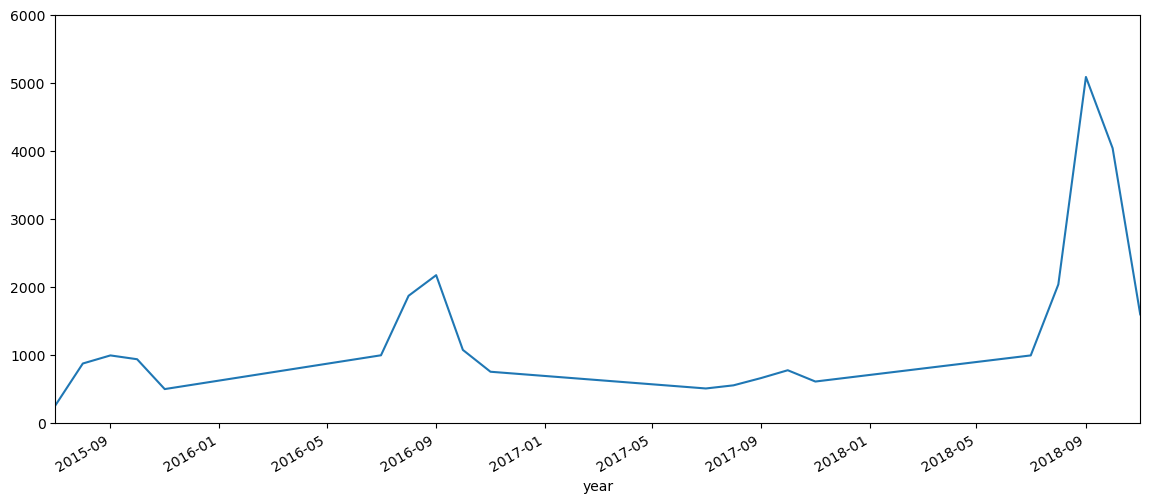

In [19]:
## xlimit and y limit
indexedDengu['Cases'].plot(xlim=['2015-07-01','2018-11-01'],ylim=[0,6000],figsize=(14,6))

# Checking stationarity

In [13]:
#Definition of stationarity = constant mean and variance

In [14]:
# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

In [15]:
rolmean = indexedDengu.rolling(window = 5).mean()
rolstd = indexedDengu.rolling(window =5).std()

print(rolmean , rolstd)

             Cases
year              
2009-07-01     NaN
2009-08-01     NaN
2009-09-01     NaN
2009-10-01     NaN
2009-11-01   141.4
2010-07-01   157.2
2010-08-01   163.4
2010-09-01   134.2
2010-10-01    97.4
2010-11-01    97.4
2011-07-01   177.8
2011-08-01   297.0
2011-09-01   333.0
2011-10-01   356.4
2011-11-01   368.0
2012-07-01   308.0
2012-08-01   182.0
2012-09-01   212.4
2012-10-01   203.0
2012-11-01   198.4
2013-07-01   209.6
2013-08-01   290.4
2013-09-01   321.0
2013-10-01   442.6
2013-11-01   509.8
2014-07-01   479.0
2014-08-01   378.8
2014-09-01   273.8
2014-10-01   140.6
2014-11-01    72.8
2015-07-01   104.8
2015-08-01   261.2
2015-09-01   442.4
2015-10-01   613.4
2015-11-01   705.4
2016-07-01   853.4
2016-08-01  1052.6
2016-09-01  1288.6
2016-10-01  1316.0
2016-11-01  1367.0
2017-07-01  1269.4
2017-08-01  1006.0
2017-09-01   703.4
2017-10-01   643.6
2017-11-01   614.8
2018-07-01   712.0
2018-08-01  1008.8
2018-09-01  1894.4
2018-10-01  2547.4
2018-11-01  2745.0             

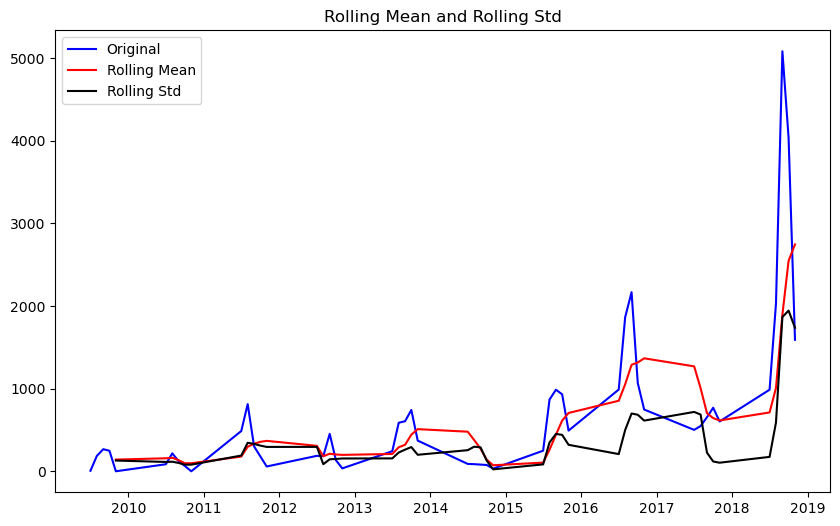

In [16]:
#plot rolling statisrics
orig = plt.plot(indexedDengu, color = "blue", label= "Original")
mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std = plt. plot(rolstd, color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Rolling Std")
plt.show(block = False)

# Perform Augmented Dickey-Fuller test (ADF)

In [17]:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis

In [18]:
from statsmodels.tsa.stattools import adfuller

I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [19]:
print("Result of Dickey-Fuller Test : ")

dftest= adfuller(indexedDengu["Cases"], autolag = "AIC") 

dfoutput = pd.Series(dftest[0:4], index = [
    "Test Statistic", "p-value", "#Lags Used", "Number of Observation Used"
])
for key,value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value

print(dfoutput)

Result of Dickey-Fuller Test : 
Test Statistic                 1.231642
p-value                        0.996197
#Lags Used                     9.000000
Number of Observation Used    40.000000
Critical Value (1%)           -3.605565
Critical Value (5%)           -2.937069
Critical Value (10%)          -2.606986
dtype: float64


Here we can see this data is Stationary

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determine rolling statistics
    movingAverage = timeseries.rolling(window = 5).mean()
    movingSTD = timeseries.rolling(window = 5).std()
    
    #plote rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = "black" , label ='Rolling Std' )
    plt.legend(loc = 'best')
    plt.title("Roling Mean and Standerd Deviation")
    plt.show(block = False)
    
    #Performing Dicky Fuller test:
    print("Result of Dickey Fuller Test: ")
    dftest= adfuller(timeseries, autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used '])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

# Now We Make our data Stationary

In [21]:
# Method 1- Differencing and Seasonal differencing

In [22]:
# Method 2 - Transformation

In [23]:
# Method 3- Rolling statistics

# Method 1- Differencing and Seasonal differencing

In [24]:
# Differencing meaning y(t) = y(t)-y(t-1)

<AxesSubplot:xlabel='year'>

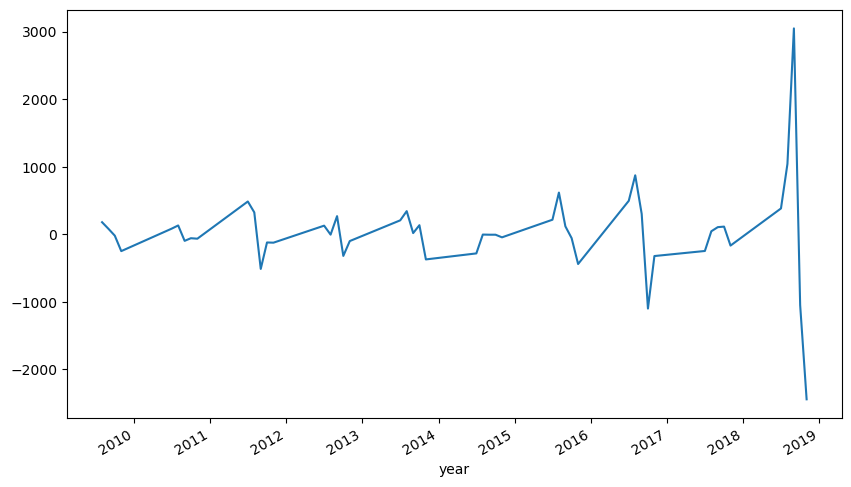

In [25]:
indexedDengu_Cases_diff = indexedDengu["Cases"] - indexedDengu["Cases"].shift(1)
indexedDengu_Cases_diff.dropna().plot()

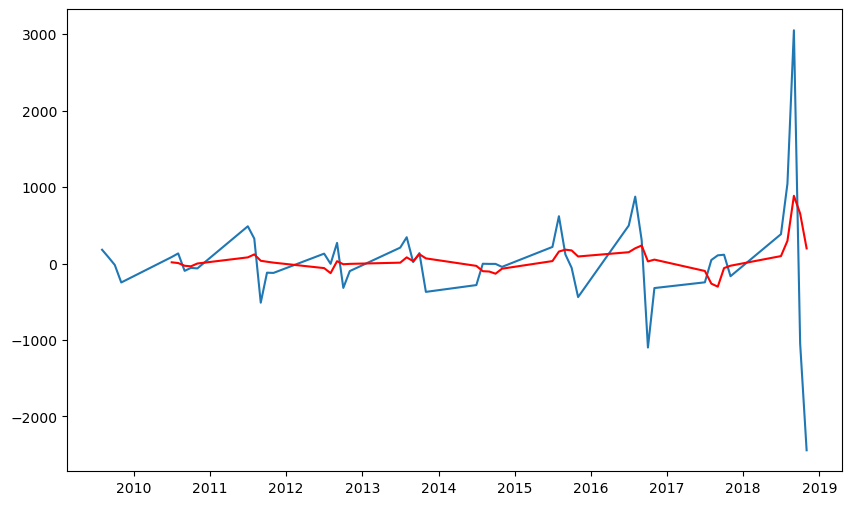

In [26]:
movingAverage = indexedDengu_Cases_diff.rolling(window = 5).mean()
movingSTD = indexedDengu_Cases_diff.rolling(window =5).std()
plt.plot(indexedDengu_Cases_diff)
plt.plot(movingAverage, color = "red")

In [27]:
indexedDengu_Cases_diff.isnull().sum()

1

In [28]:
indexedDengu_Cases_diff_1=indexedDengu_Cases_diff.dropna()

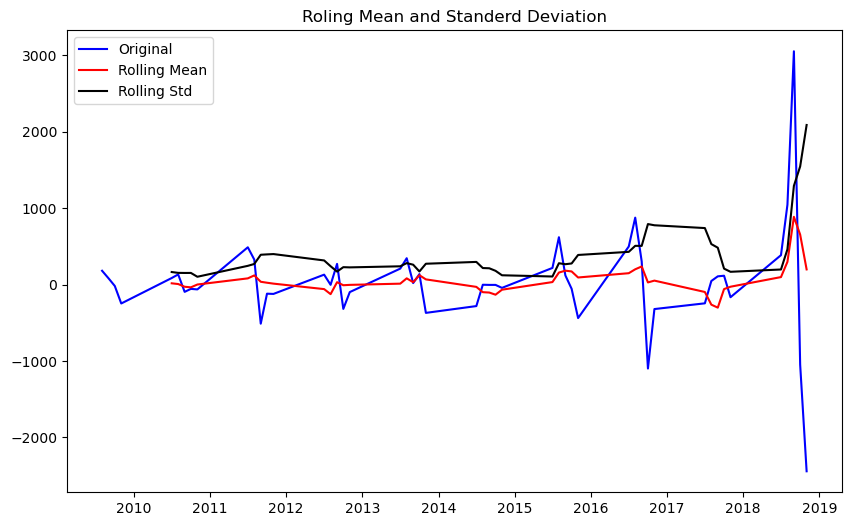

Result of Dickey Fuller Test: 
Test Statistic                 -6.009906e+00
p-value                         1.582563e-07
#Lags Used                      8.000000e+00
Number of Observations Used     4.000000e+01
Critical Value (1%)            -3.605565e+00
Critical Value (5%)            -2.937069e+00
Critical Value (10%)           -2.606986e+00
dtype: float64


In [29]:
test_stationarity(indexedDengu_Cases_diff_1)

In [30]:
# Sesonal differencing meaning - y(t) = y(t)-y(t-n)

<AxesSubplot:xlabel='year'>

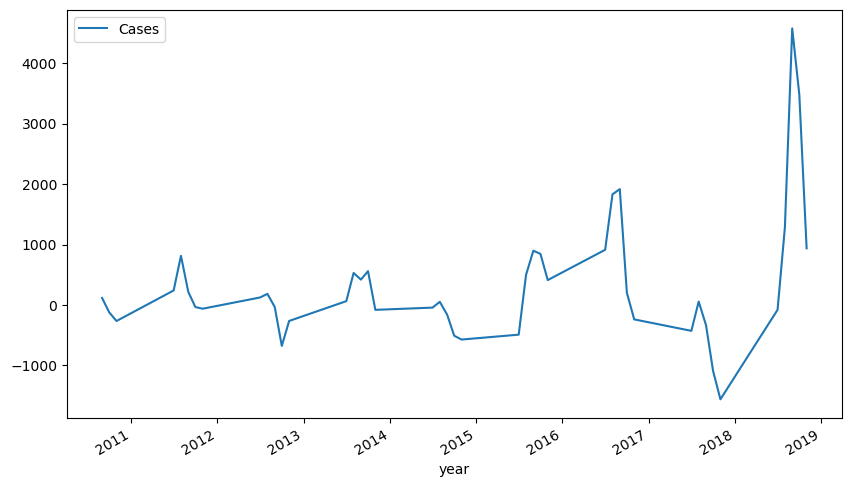

In [31]:
indexedDengu_Cases_diff_7 = indexedDengu - indexedDengu.shift(7)
indexedDengu_Cases_diff_7.dropna().plot()

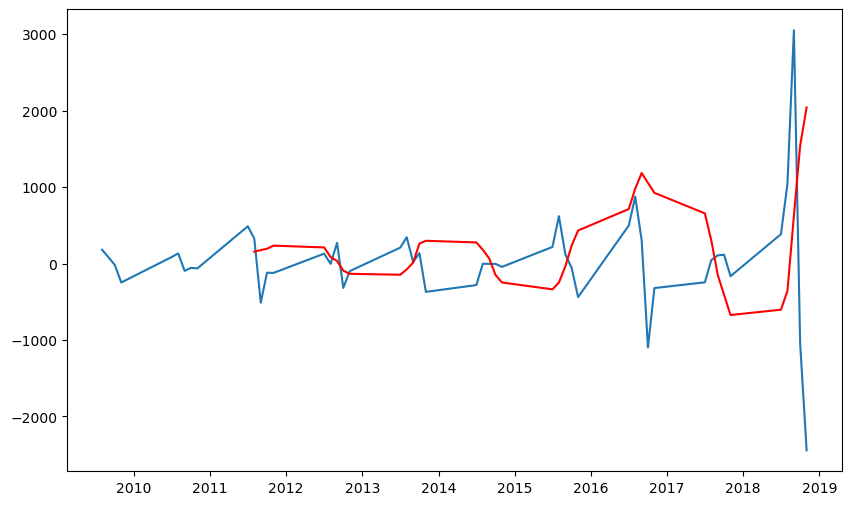

In [32]:
movingAverage = indexedDengu_Cases_diff_7.rolling(window = 5).mean()
movingSTD = indexedDengu_Cases_diff_7.rolling(window =5).std()
plt.plot(indexedDengu_Cases_diff)
plt.plot(movingAverage, color = "red")

In [33]:
indexedDengu_Cases_diff_7.isnull().sum()

Cases    7
dtype: int64

In [34]:
indexedDengu_Cases_diff_7_1=indexedDengu_Cases_diff_7.dropna()

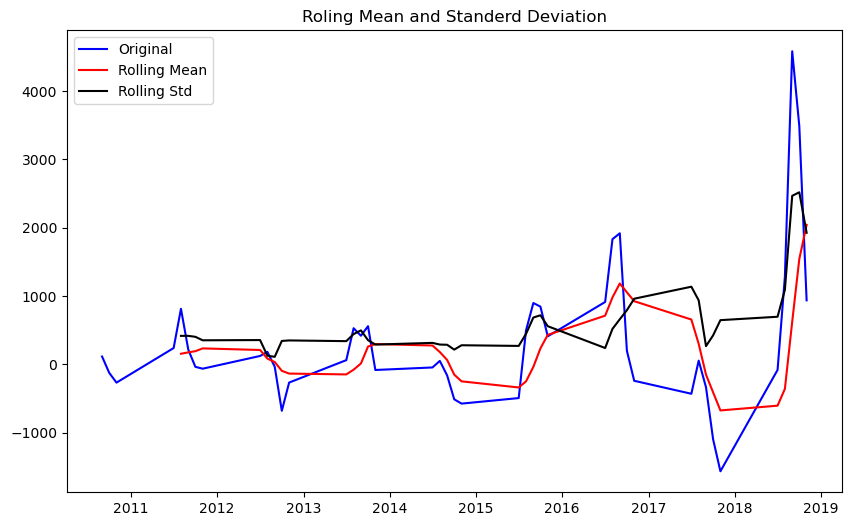

Result of Dickey Fuller Test: 
Test Statistic                  -0.456965
p-value                          0.900145
#Lags Used                       9.000000
Number of Observations Used     33.000000
Critical Value (1%)             -3.646135
Critical Value (5%)             -2.954127
Critical Value (10%)            -2.615968
dtype: float64


In [35]:
test_stationarity(indexedDengu_Cases_diff_7_1)

# Method 2 - Transformation

3 Transformation are hear:

1. Log Transformation

2. Square root Transformation

3. Cubed root Transformation

                           1.Log Transformation

In [36]:
###################Calculate the log transformation#######################

In [37]:
indexedDengu_log_Tra = np.log(indexedDengu['Cases'])

I:\ML-Code\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='year'>

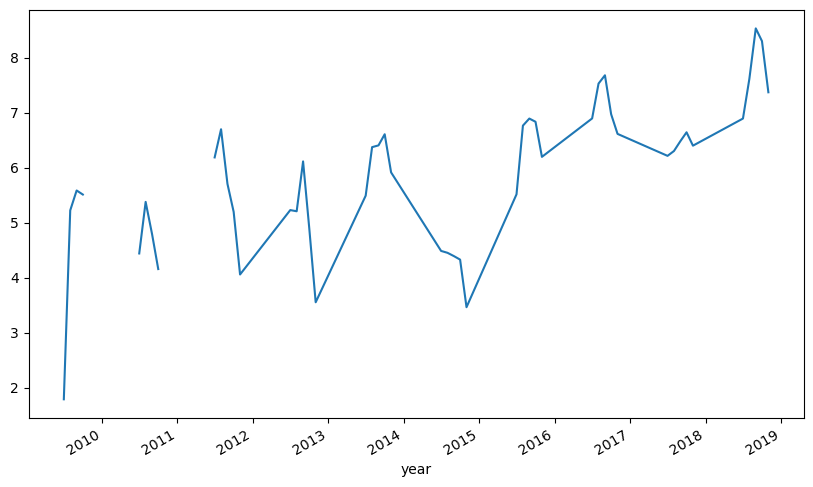

In [38]:
indexedDengu_log_Tra.dropna().plot()

In [39]:
indexedDengu_log_Tra.isnull().sum()

0

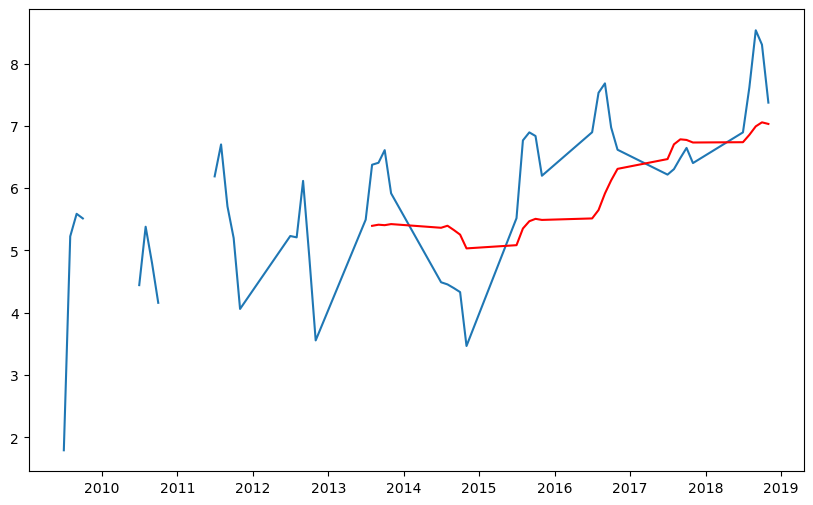

In [54]:
movingAverage = indexedDengu_log_Tra.rolling(window = 12).mean()
movingSTD = indexedDengu_log_Tra.rolling(window = 12).std()
plt.plot(indexedDengu_log_Tra)
plt.plot(movingAverage, color = "red")

In [55]:
#Differencing = Logge_Transform - MovingAverage

In [56]:
indexedDengu_log_Tra_Diff = indexedDengu_log_Tra - movingAverage
indexedDengu_log_Tra_Diff.head(10)

year
2009-07-01   NaN
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2010-07-01   NaN
2010-08-01   NaN
2010-09-01   NaN
2010-10-01   NaN
2010-11-01   NaN
Name: Cases, dtype: float64

In [57]:
#Remove Nan Values
indexedDengu_log_Tra_Diff.dropna(inplace = True)
indexedDengu_log_Tra_Diff.head(10)

year
2013-08-01    0.980624
2013-09-01    0.994261
2013-10-01    1.204346
2013-11-01    0.493774
2014-07-01   -0.874636
2014-08-01   -0.941751
2014-09-01   -0.931927
2014-10-01   -0.922414
2014-11-01   -1.566565
2015-07-01    0.433518
Name: Cases, dtype: float64

In [58]:
indexedDengu_log_Tra_Diff.isnull().sum()

0

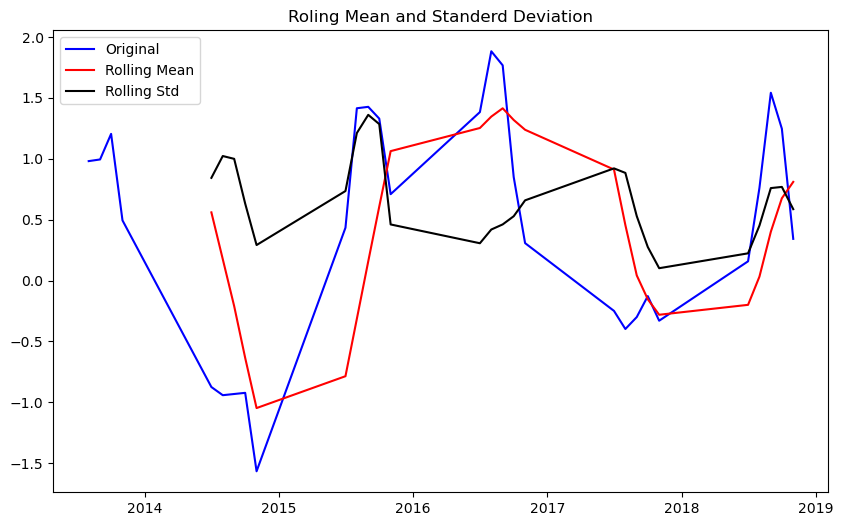

Result of Dickey Fuller Test: 
Test Statistic                  -2.935853
p-value                          0.041335
#Lags Used                       5.000000
Number of Observations Used     23.000000
Critical Value (1%)             -3.752928
Critical Value (5%)             -2.998500
Critical Value (10%)            -2.638967
dtype: float64


In [59]:
test_stationarity(indexedDengu_log_Tra_Diff)

After the log Transform our data is Stationary now

If our data was not stationary then we would have to apply many more methods to make the data stationary

AS IF:

<AxesSubplot:xlabel='year'>

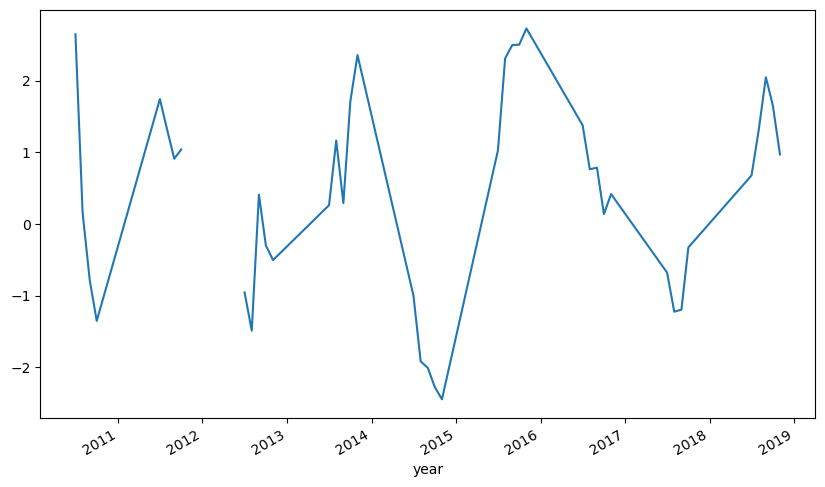

In [60]:
indexedDengu_log_Tra_Shift = indexedDengu_log_Tra - indexedDengu_log_Tra.shift(5)
indexedDengu_log_Tra_Shift.dropna().plot()

In [61]:
indexedDengu_log_Tra_Shift.isnull().sum()

6

In [62]:
indexedDengu_log_Tra_Shift_1=indexedDengu_log_Tra_Shift.dropna()

In [63]:
indexedDengu_log_Tra_Shift_1.isnull().sum()

0

In [52]:
#test_stationarity(indexedDengu_log_Tra_Shift_1)

In [53]:
#----------------------------------------Calculate the square root------------------------------------

--------------------------Square root Transformation-----------------

In [523]:
#indexedDengu["Sqr_root_Tra"] = np.sqrt(indexedDengu['Cases'])
indexedDengu_Sqr_root_Tra    = np.sqrt(indexedDengu['Cases'])

<AxesSubplot:xlabel='year'>

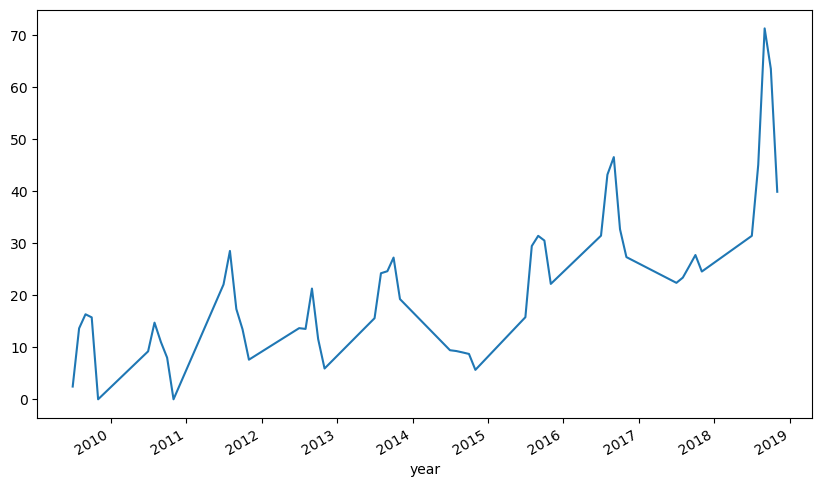

In [524]:
#indexedDengu["Sqr_root_Tra"].dropna().plot()
indexedDengu_Sqr_root_Tra.dropna().plot()

In [525]:
indexedDengu_Sqr_root_Tra

year
2009-07-01     2.449490
2009-08-01    13.638182
2009-09-01    16.340135
2009-10-01    15.748016
2009-11-01     0.000000
2010-07-01     9.219544
2010-08-01    14.730920
2010-09-01    11.000000
2010-10-01     8.000000
2010-11-01     0.000000
2011-07-01    22.068076
2011-08-01    28.513155
2011-09-01    17.349352
2011-10-01    13.453624
2011-11-01     7.615773
2012-07-01    13.674794
2012-08-01    13.527749
2012-09-01    21.283797
2012-10-01    11.575837
2012-11-01     5.916080
2013-07-01    15.588457
2013-08-01    24.228083
2013-09-01    24.617067
2013-10-01    27.239677
2013-11-01    19.261360
2014-07-01     9.433981
2014-08-01     9.273618
2014-09-01     9.000000
2014-10-01     8.717798
2014-11-01     5.656854
2015-07-01    15.779734
2015-08-01    29.461840
2015-09-01    31.416556
2015-10-01    30.512293
2015-11-01    22.181073
2016-07-01    31.448370
2016-08-01    43.174066
2016-09-01    46.551047
2016-10-01    32.680269
2016-11-01    27.331301
2017-07-01    22.383029
2017-08-01 

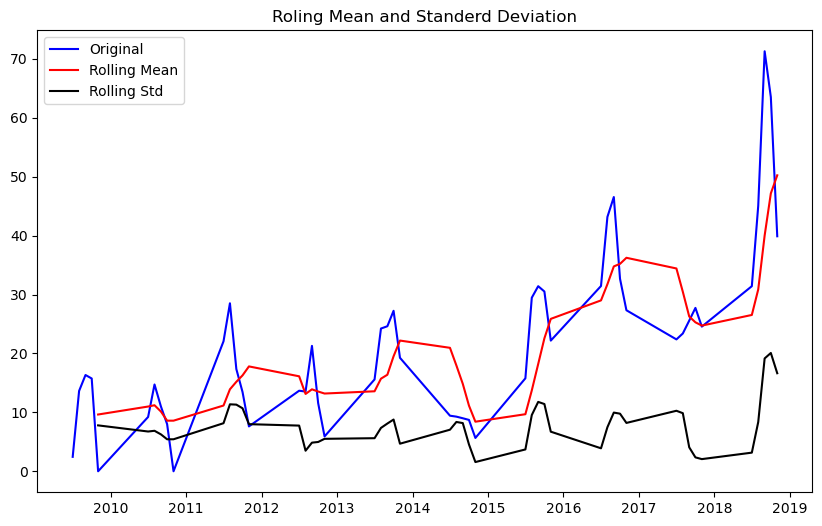

Result of Dickey Fuller Test: 
Test Statistic                  -1.585147
p-value                          0.491050
#Lags Used                       2.000000
Number of Observations Used     47.000000
Critical Value (1%)             -3.577848
Critical Value (5%)             -2.925338
Critical Value (10%)            -2.600774
dtype: float64


In [526]:
test_stationarity(indexedDengu_Sqr_root_Tra)

<AxesSubplot:xlabel='year'>

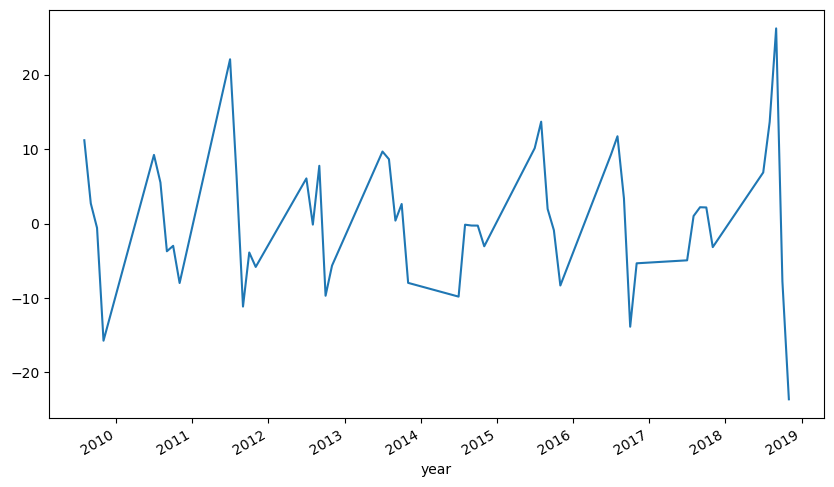

In [527]:
indexedDengu_Sqr_root_Tra_diff = indexedDengu_Sqr_root_Tra - indexedDengu_Sqr_root_Tra.shift(1)
indexedDengu_Sqr_root_Tra_diff.dropna().plot()

In [528]:
indexedDengu_Sqr_root_Tra_diff_1=indexedDengu_Sqr_root_Tra_diff.dropna()

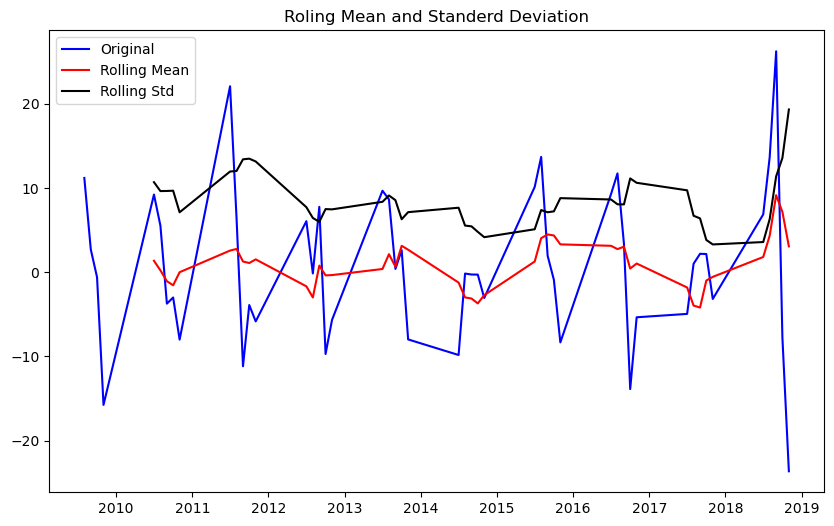

Result of Dickey Fuller Test: 
Test Statistic                  -4.356599
p-value                          0.000354
#Lags Used                       8.000000
Number of Observations Used     40.000000
Critical Value (1%)             -3.605565
Critical Value (5%)             -2.937069
Critical Value (10%)            -2.606986
dtype: float64


In [529]:
test_stationarity(indexedDengu_Sqr_root_Tra_diff_1)

In [530]:
 #------------------------------------- Calculate the cubed root ----------------------------------                         

 ----------------------------------Cubed root Transformation---------------------------------------

In [531]:
indexedDengu_Cubed_root_Tra = np.cbrt(indexedDengu['Cases'])

<AxesSubplot:xlabel='year'>

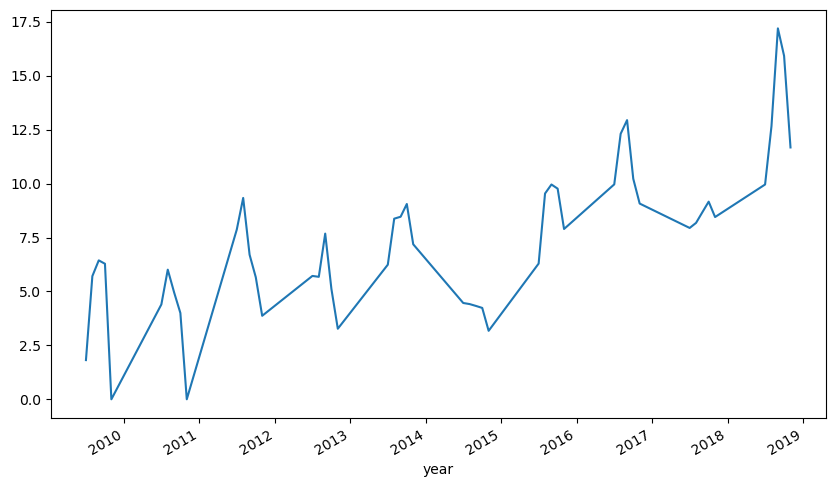

In [532]:
indexedDengu_Cubed_root_Tra.dropna().plot()

In [533]:
indexedDengu_Cubed_root_Tra.isnull().sum()

0

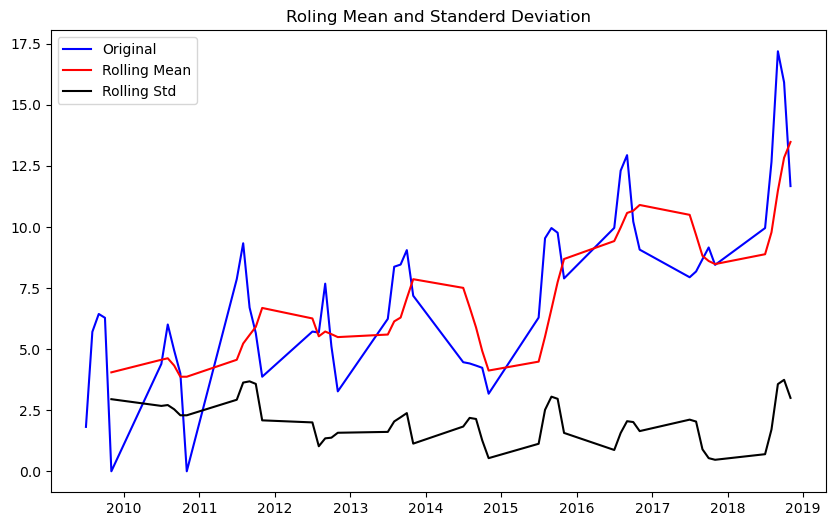

Result of Dickey Fuller Test: 
Test Statistic                  -0.405411
p-value                          0.909191
#Lags Used                       8.000000
Number of Observations Used     41.000000
Critical Value (1%)             -3.600983
Critical Value (5%)             -2.935135
Critical Value (10%)            -2.605963
dtype: float64


In [534]:
test_stationarity(indexedDengu_Cubed_root_Tra)

# Method 3- Rolling statistics

In [535]:
indexedDengu_Rolling_Mean = indexedDengu['Cases'].rolling(window = 8).mean()

<AxesSubplot:xlabel='year'>

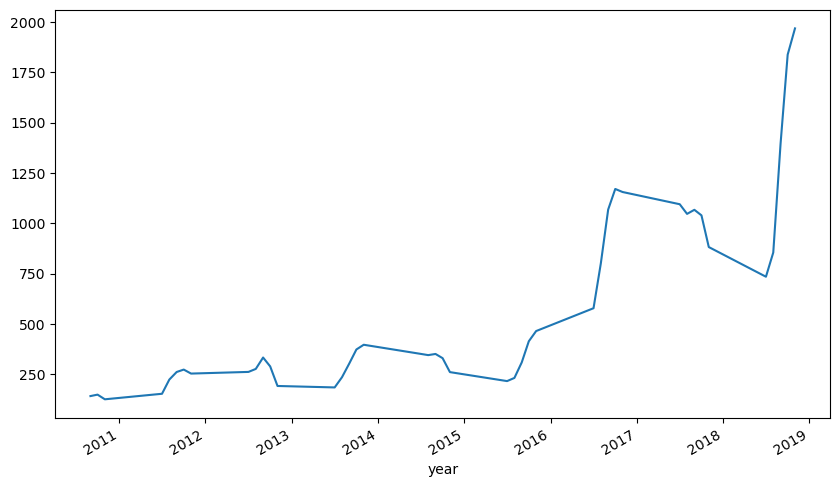

In [536]:
indexedDengu_Rolling_Mean.dropna().plot()

In [537]:
indexedDengu_Rolling_Mean.isnull().sum()

7

In [538]:
indexedDengu_Rolling_Mean_1=indexedDengu_Rolling_Mean.dropna()

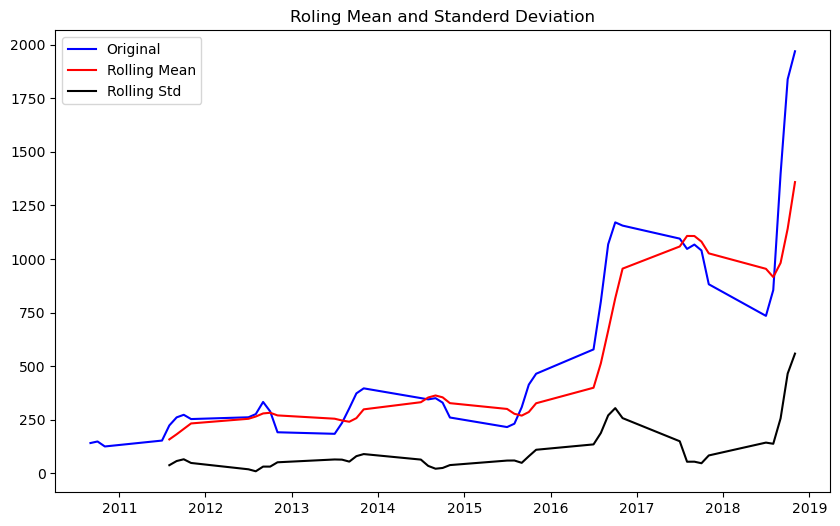

Result of Dickey Fuller Test: 
Test Statistic                   4.043425
p-value                          1.000000
#Lags Used                       8.000000
Number of Observations Used     34.000000
Critical Value (1%)             -3.639224
Critical Value (5%)             -2.951230
Critical Value (10%)            -2.614447
dtype: float64


In [539]:
test_stationarity(indexedDengu_Rolling_Mean_1)

# Component of Time Series

In [540]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDengu_log_Tra_Diff, model='additive', extrapolate_trend='freq', period=1)

In [541]:
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

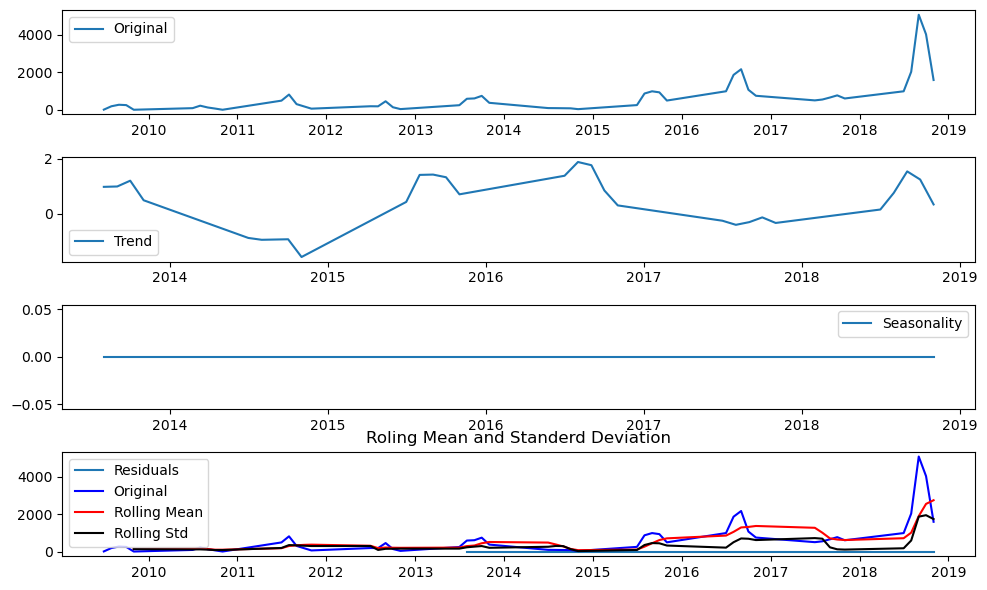

Result of Dickey Fuller Test: 
Test Statistic                   1.231642
p-value                          0.996197
#Lags Used                       9.000000
Number of Observations Used     40.000000
Critical Value (1%)             -3.605565
Critical Value (5%)             -2.937069
Critical Value (10%)            -2.606986
dtype: float64


In [542]:
plt.subplot(411)
plt.plot(indexedDengu["Cases"], label = 'Original')
plt.legend(loc= 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc= 'best')

plt.subplot(413)
plt.plot(seasonal, label = "Seasonality")
plt.legend(loc= 'best')

plt.subplot(414)
plt.plot(residual, label = "Residuals")
plt.legend(loc= 'best')

plt.tight_layout()
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(indexedDengu["Cases"])

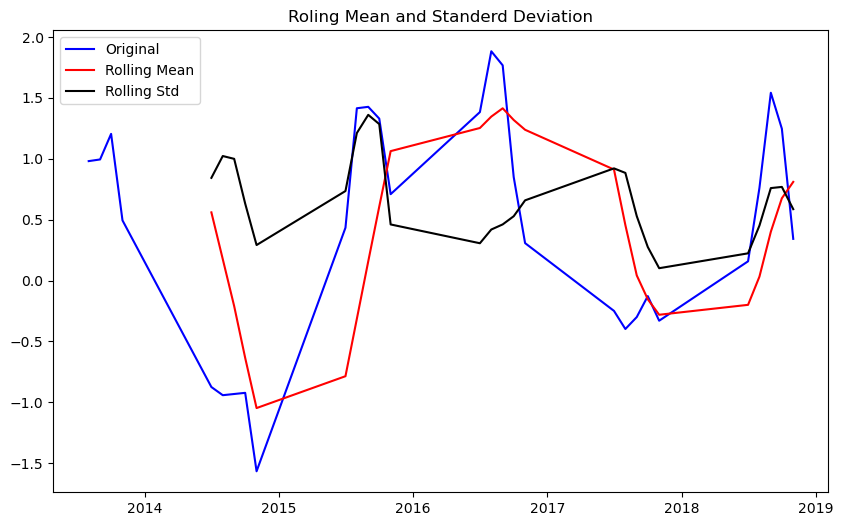

Result of Dickey Fuller Test: 
Test Statistic                  -2.935853
p-value                          0.041335
#Lags Used                       5.000000
Number of Observations Used     23.000000
Critical Value (1%)             -3.752928
Critical Value (5%)             -2.998500
Critical Value (10%)            -2.638967
dtype: float64


In [543]:
#check noice 
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(indexedDengu_log_Tra_Diff)

# Autocorrelation function(ACF) and Partial Autocorrelation Function(PACF) Graph

ACF Definition = A function which gives us values of auto-correlation of any series with its lagged values.

PACF Definition = An indirect function to find Auto correlation after removing the relationship explained by previous lags

In [544]:
indexedDengu.sort_index(inplace= True)

In [545]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf  = acf (indexedDengu_log_Tra_Diff, nlags= 5)
lag_pacf = pacf(indexedDengu_log_Tra_Diff, nlags= 5, method ='ols') 
#ols =Ordinary Least Squares regression method

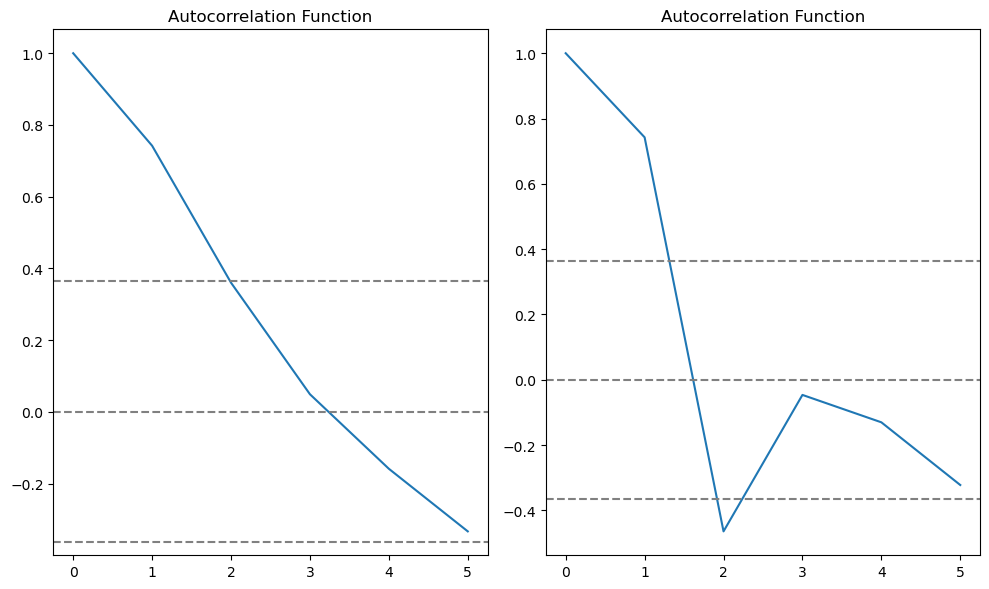

In [546]:
#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y= 0 , linestyle= '--', color= 'gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDengu_log_Tra_Diff)) , linestyle= '--', color= 'gray')
plt.axhline(y= 1.96/np.sqrt(len(indexedDengu_log_Tra_Diff)) , linestyle= '--', color= 'gray')
plt.title("Autocorrelation Function")

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y= 0 , linestyle= '--', color= 'gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDengu_log_Tra_Diff)) , linestyle= '--', color= 'gray')
plt.axhline(y= 1.96/np.sqrt(len(indexedDengu_log_Tra_Diff)) , linestyle= '--', color= 'gray')
plt.title("Autocorrelation Function")
plt.tight_layout()

In [547]:
import statsmodels.api as sm

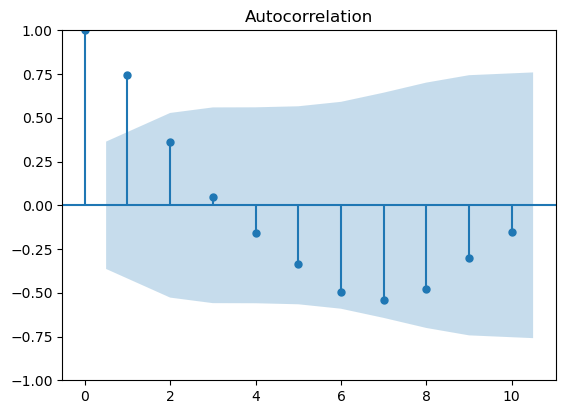

In [548]:
fig = plt.figure(figsize= (14,10))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(indexedDengu_log_Tra_Diff.dropna(), lags=10 ,ax= ax1)

I:\ML-Code\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  nobs = len(df)


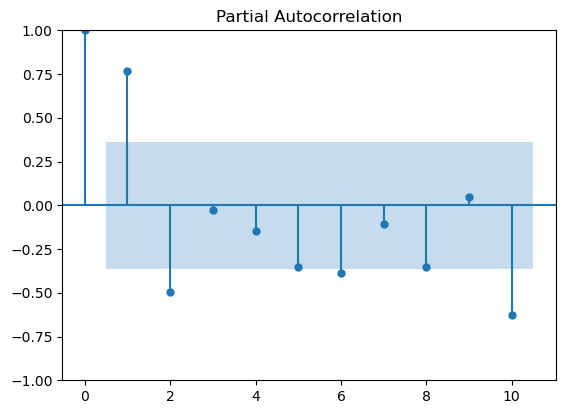

In [549]:
fig = plt.figure(figsize= (14,10))
ax2 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_pacf(indexedDengu_log_Tra_Diff.dropna(), lags=10 ,ax= ax2)

In [550]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [551]:
arimamodel(indexedDengu_log_Tra_Diff)

Performing stepwise search to minimize aic
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=67.665, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=68.436, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=69.618, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.310 seconds


ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# Autoregressive Integrated Moving Average (ARIMA)

In [552]:
import statsmodels.api as smapi

#model = smapi.tsa.arima.ARIMA(train_data, order=(1,1,2))

#result = model.fit()

In [553]:
#from statsmodels.tsa.arima_model import ARIMA
#import statsmodels.api as sm

# AR Model

Plotting AR Model


I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


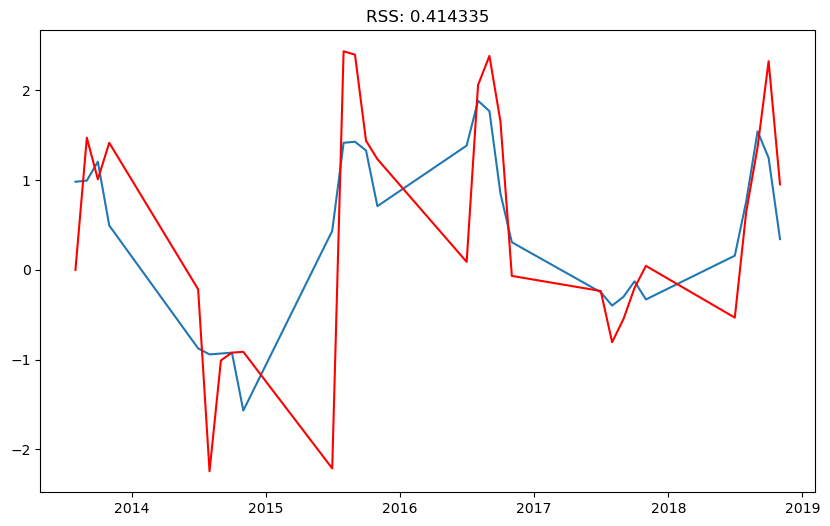

In [554]:
#AR Model

model = sm.tsa.arima.ARIMA(indexedDengu_log_Tra_Diff, order = (0,2,0))
result_AR = model.fit()

plt.plot(indexedDengu_log_Tra_Diff)
plt.plot(result_AR.fittedvalues, color= 'red')
plt.title("RSS: %4f" %sum(result_AR.fittedvalues-indexedDengu_log_Tra_Diff))
print("Plotting AR Model")

# MA Model

Plotting MR Model


I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


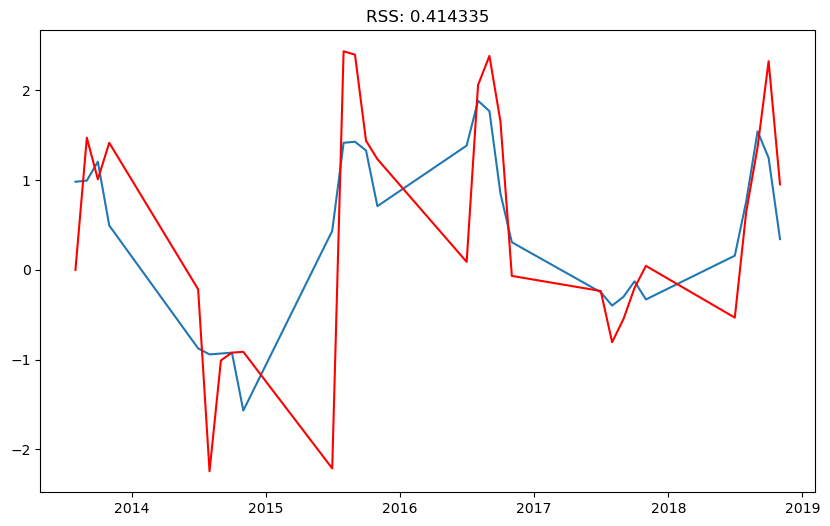

In [555]:
model = sm.tsa.arima.ARIMA(indexedDengu_log_Tra_Diff, order = (0,2,0))
result_MA = model.fit()

plt.plot(indexedDengu_log_Tra_Diff)
plt.plot(result_AR.fittedvalues, color= 'red')
plt.title("RSS: %4f" %sum(result_AR.fittedvalues-indexedDengu_log_Tra_Diff))
print("Plotting MR Model")

# ARIMA Model

Plotting ARIMA Model


I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


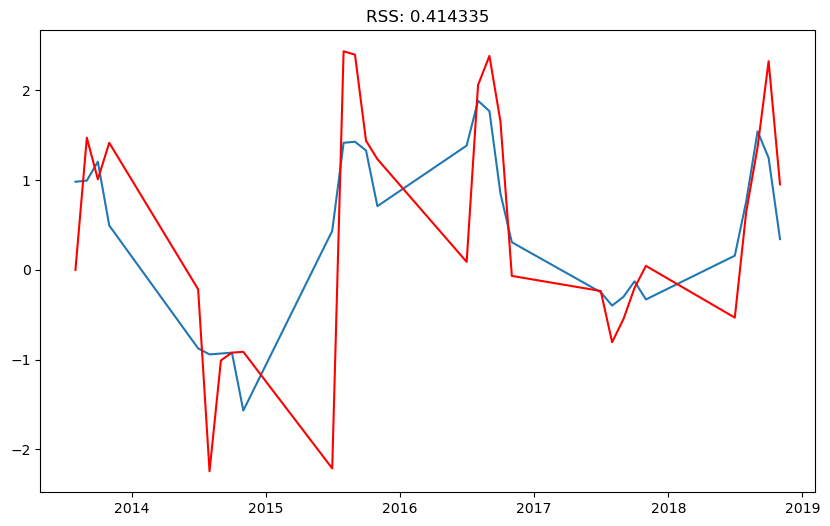

In [556]:
model = sm.tsa.arima.ARIMA(indexedDengu_log_Tra_Diff, order = (0,2,0))
result_ARIMA = model.fit()

plt.plot(indexedDengu_log_Tra_Diff)
plt.plot(result_AR.fittedvalues, color= 'red')
plt.title("RSS: %4f" %sum(result_ARIMA.fittedvalues-indexedDengu_log_Tra_Diff))
print("Plotting ARIMA Model")

# Taking result back to orginal scale

In [557]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues , copy = True)
print(prediction_ARIMA_diff.head(5))

year
2013-08-01    0.000000
2013-09-01    1.470937
2013-10-01    1.007899
2013-11-01    1.414430
2014-07-01   -0.216797
dtype: float64


In [558]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

year
2013-08-01    0.000000
2013-09-01    1.470937
2013-10-01    2.478835
2013-11-01    3.893265
2014-07-01    3.676468
dtype: float64


In [559]:
predictions_ARIMA_Log= pd.Series(indexedDengu_log_Tra_Diff.iloc[0], index= indexedDengu_log_Tra_Diff.index)
predictions_ARIMA_Log= predictions_ARIMA_Sqr.add(predictions_ARIMA_diff_cumsum, fill_value= 0)
predictions_ARIMA_Log.head()

year
2013-08-01    0.980624
2013-09-01    3.936135
2013-10-01    6.162016
2013-11-01    8.280305
2014-07-01    6.478300
dtype: float64

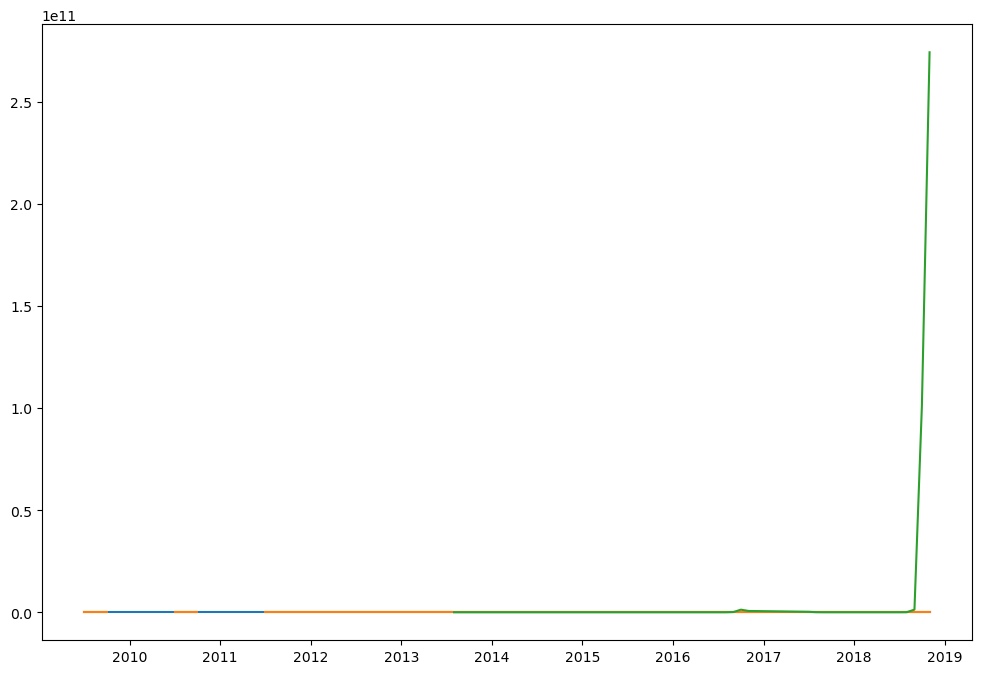

In [465]:
#This needed for Logge Transformation
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(predictions_ARIMA_Log)
plt.plot(indexedDengu)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDengu)**2)/len(indexedDengu)))

In [570]:
result_ARIMA.predict(10,20)

year
2015-08-01    2.433600
2015-09-01    2.395855
2015-10-01    1.438042
2015-11-01    1.232670
2016-07-01    0.088689
2016-08-01    2.057644
2016-09-01    2.381898
2016-10-01    1.651797
2016-11-01   -0.067762
2017-07-01   -0.235498
2017-08-01   -0.806115
Name: predicted_mean, dtype: float64